In [8]:
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
from hydra import compose, initialize
from matplotlib import pyplot as plt
from matplotlib_venn import venn2


def draw_venn2(train, test, rows, columns, x_size, y_size):
    fig, axes = plt.subplots(rows, columns, figsize=(x_size, y_size))
    column_names = test.columns
    for col, ax in zip(column_names, axes.ravel()):
        venn2(
            subsets=(set(train[col].dropna().unique()), set(test[col].dropna().unique())),
            set_labels=("train", "test"),
            ax=ax,
        )
        ax.set_title(col)
    fig.tight_layout()


with initialize(config_path="config", version_base=None):
    cfg = compose(config_name="config")
    cfg.exp_number = Path().resolve().name


In [9]:
train_df = pd.read_csv(cfg.data.train_path)
clothing_df = pd.read_csv(cfg.data.clothing_path)
test_df = pd.read_csv(cfg.data.test_path)
# sub_df = pd.read_csv(cfg.data.sample_submission_path)


In [10]:
print('■ train')
display(train_df.head())
print('■ test')
display(test_df.head())
print('■ clothing')
display(clothing_df.head())
# print('■ submission')
# display(sub_df.head())


■ train


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count
0,0,25,3-season skirt!,"Adorable, well-made skirt! lined and very slim...",5,1,4
1,0,39,Very cute,Love the asymmetrical hem. waist fit snugly as...,5,1,0
2,0,42,Beautiful! fruns small for typical retailer si...,I love this skirt! i wasn't sure about the mix...,5,1,5
3,0,45,NaN,I was really pleased with this skirt. the ligh...,5,1,9
4,0,57,"Unique, pretty asymmetric skirt",I saw this skirt in retailer several months ag...,5,1,1


■ test


,Clothing ID,Age,Title,Review Text,Positive Feedback Count
0,0,32,So happy i bought this skirt!,"I love this skirt. it does run a little small,...",0
1,0,34,Runs small,"Beautiful patterns and colors, but it sits ver...",0
2,0,37,Love the comfort of thi skirt,It is easily paired with a nice tip for work a...,0
3,0,39,Way too small,"This is a beautiful skirt, but runs very small...",10
4,0,39,NaN,I usually wear a size 8/10 and i needed a larg...,0


■ clothing


,Clothing ID,Division Name,Department Name,Class Name
0,0,General,Bottoms,Skirts
1,1,General,Bottoms,Pants
2,2,General,Tops,Sweaters
3,3,General,Dresses,Dresses
4,4,General,Dresses,Dresses


In [4]:
print('■ train')
display(train_df.info())
print('■ test')
display(test_df.info())
print('■ anime')
display(clothing_df.info())


■ train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              10000 non-null  int64 
 1   Age                      10000 non-null  int64 
 2   Title                    8425 non-null   object
 3   Review Text              8720 non-null   object
 4   Rating                   10000 non-null  int64 
 5   Recommended IND          10000 non-null  int64 
 6   Positive Feedback Count  10000 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 547.0+ KB


None

■ test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11155 entries, 0 to 11154
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              11155 non-null  int64 
 1   Age                      11155 non-null  int64 
 2   Title                    9335 non-null   object
 3   Review Text              9749 non-null   object
 4   Positive Feedback Count  11155 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 435.9+ KB


None

■ anime
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Clothing ID      233 non-null    int64 
 1   Division Name    233 non-null    object
 2   Department Name  233 non-null    object
 3   Class Name       233 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.4+ KB


None

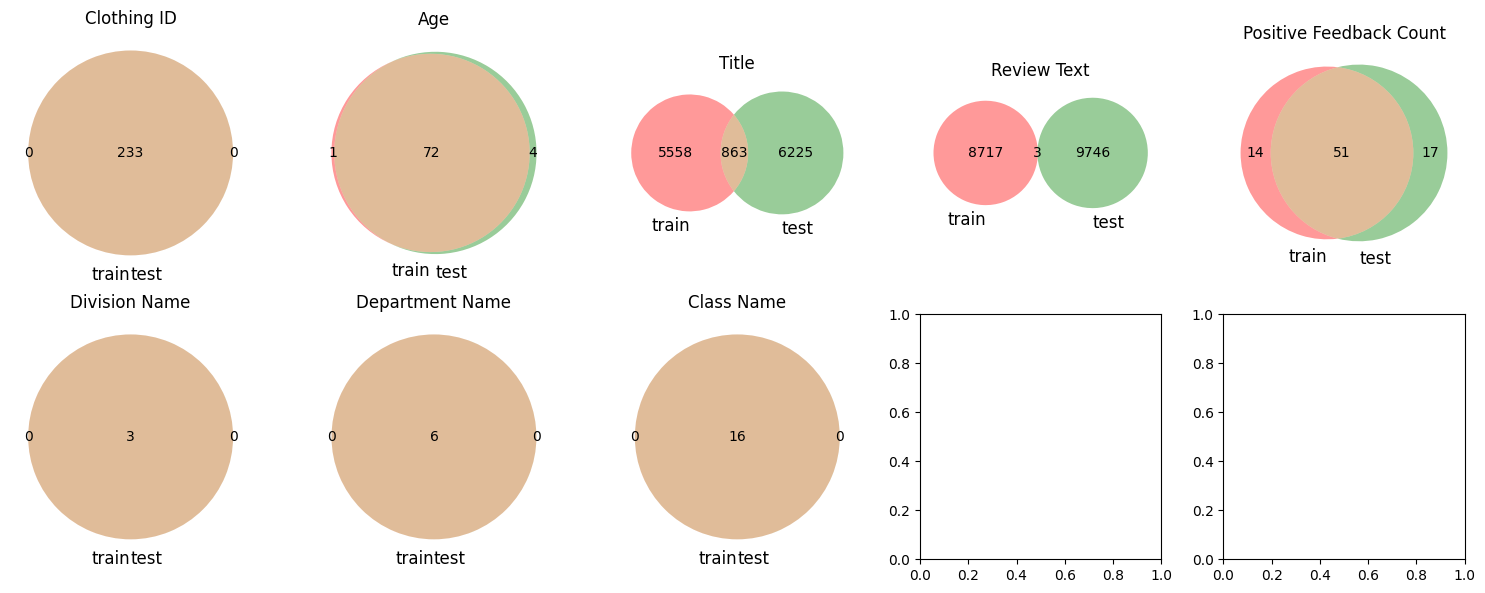

In [11]:
train_df = train_df.merge(clothing_df, how="left", on="Clothing ID")
test_df = test_df.merge(clothing_df, how="left", on="Clothing ID")

draw_venn2(train_df, test_df, rows=2, columns=5, x_size=15, y_size=6)


### 各カラムの分布

<Axes: >

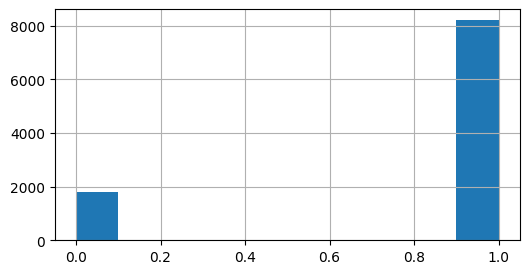

In [12]:
train_df[cfg.target].hist(bins=10, figsize=(6, 3))


Clothing ID
226    480
83     391
148    360
164    268
65     264
      ... 
14       4
183      2
41       2
15       2
121      1
Name: count, Length: 233, dtype: int64

Clothing ID
226    544
83     415
148    396
164    314
80     284
      ... 
79       3
213      3
150      3
23       3
69       3
Name: count, Length: 233, dtype: int64

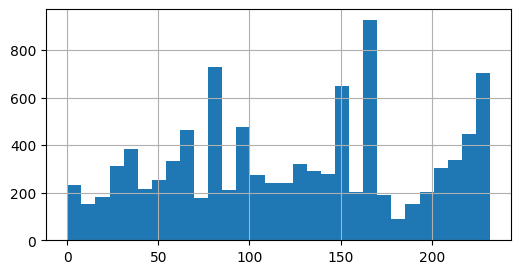

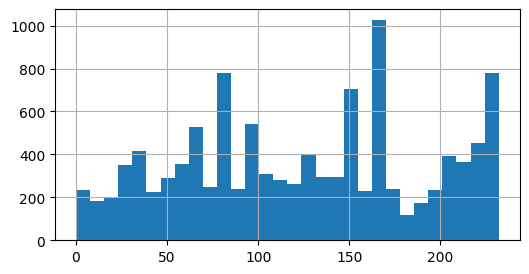

In [45]:
col = "Clothing ID"
display(train_df[col].value_counts(dropna=False))
display(test_df[col].value_counts(dropna=False))
train_df[col].hist(bins=30, figsize=(6, 3))
plt.show()
test_df[col].hist(bins=30, figsize=(6, 3))
plt.show()


Age
39    525
36    372
35    365
34    343
41    343
     ... 
99      1
93      1
87      1
91      1
18      1
Name: count, Length: 73, dtype: int64

Age
39    621
35    438
36    382
37    381
34    375
     ... 
85      2
86      2
92      1
93      1
99      1
Name: count, Length: 76, dtype: int64

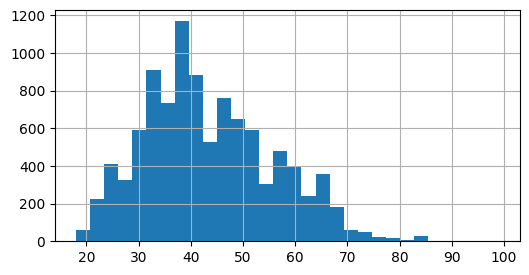

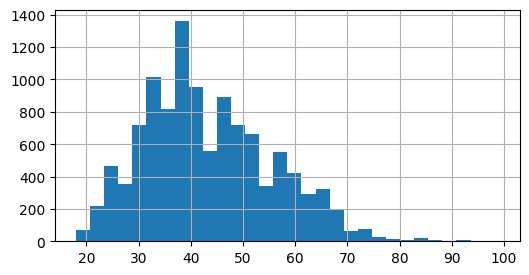

In [46]:
col = "Age"
display(train_df[col].value_counts(dropna=False))
display(test_df[col].value_counts(dropna=False))
train_df[col].hist(bins=30, figsize=(6, 3))
plt.show()
test_df[col].hist(bins=30, figsize=(6, 3))
plt.show()


In [47]:
col = "Title"
display(train_df[col].value_counts(dropna=False))
display(test_df[col].value_counts(dropna=False))


Title
NaN                                  1575
Love it!                               72
Beautiful                              55
Love                                   43
Love!                                  43
                                     ... 
Classy and funky!                       1
Love the diagonal design                1
Made poorly, but still kinda cute       1
Love the back scoop!                    1
Too heavy                               1
Name: count, Length: 6422, dtype: int64

Title
NaN                                        1820
Love it!                                     58
Beautiful!                                   38
Love                                         36
Beautiful dress                              35
                                           ... 
Beautiful halter to show off shoulders!       1
I live in these tanks!                        1
Very retro                                    1
Will never be the same after washing          1
More beautiful in reality                     1
Name: count, Length: 7089, dtype: int64

In [50]:
col = "Review Text"
display(train_df[col].value_counts(dropna=False))
display(test_df[col].value_counts(dropna=False))


Review Text
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      1280
I love these jeans, cant believe i never purchased them earlier. i'm always a 30 in paige and ag and this was no different. i will say that i did fit into the 29, so it could be that they run slightly large. the fabric is amazing!! and the white is perfect. love that it is not see through and fabric is substantial.the length for me at 5'5 was at my ankle. i loved them so much that i bought them in white and beige/cream. highly recommend.                                     

Review Text
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    1406
I love this skirt. it does run a little small, i ordered an extra small and it is tight at the waist, but still works. i have received more compliments on this skirt than maybe anything i have owned. i've been stopped at the grocery store by people telling me how much they like it. i also work with kids, and they all love it as well.                                                                                                                                                 

In [52]:
test_df


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,32,So happy i bought this skirt!,"I love this skirt. it does run a little small,...",0,General,Bottoms,Skirts
1,0,34,Runs small,"Beautiful patterns and colors, but it sits ver...",0,General,Bottoms,Skirts
2,0,37,Love the comfort of thi skirt,It is easily paired with a nice tip for work a...,0,General,Bottoms,Skirts
3,0,39,Way too small,"This is a beautiful skirt, but runs very small...",10,General,Bottoms,Skirts
4,0,39,NaN,I usually wear a size 8/10 and i needed a larg...,0,General,Bottoms,Skirts
...,...,...,...,...,...,...,...,...
11150,232,53,More beautiful in reality,I purchased this dress on a whim. it is easy t...,0,General,Dresses,Dresses
11151,232,58,Perfect dress!,This dress is very flattering on and can easil...,0,General,Dresses,Dresses
11152,232,60,Perfect dress,This is the most perfect dress i've ever bough...,0,General,Dresses,Dresses
11153,232,62,Really great!,This is a beautiful dress! not too interested ...,5,General,Dresses,Dresses


Rating
5    5552
4    2175
3    1240
2     671
1     362
Name: count, dtype: int64

<Axes: >

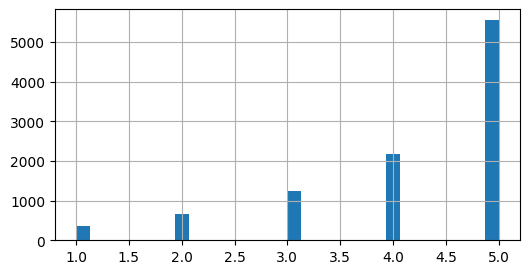

In [53]:
col = "Rating"
display(train_df[col].value_counts(dropna=False))
train_df[col].hist(bins=30, figsize=(6, 3))


Positive Feedback Count
0     4743
1     1712
2      912
3      593
4      397
      ... 
77       1
46       1
58       1
59       1
54       1
Name: count, Length: 65, dtype: int64

Positive Feedback Count
0      5299
1      1906
2      1054
3       677
4       431
       ... 
117       1
108       1
45        1
47        1
122       1
Name: count, Length: 68, dtype: int64

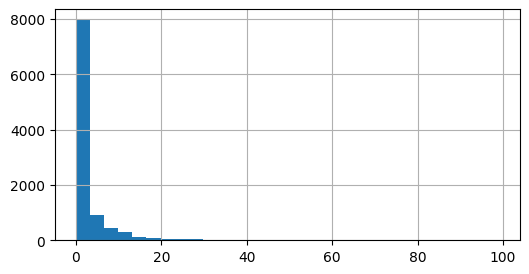

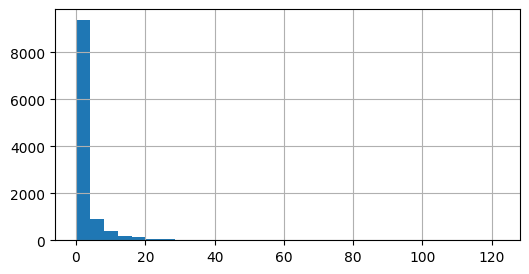

In [54]:
col = "Positive Feedback Count"
display(train_df[col].value_counts(dropna=False))
display(test_df[col].value_counts(dropna=False))
train_df[col].hist(bins=30, figsize=(6, 3))
plt.show()
test_df[col].hist(bins=30, figsize=(6, 3))
plt.show()


Division Name
General           9789
Initmates          151
General Petite      60
Name: count, dtype: int64

Division Name
General           10954
Initmates           142
General Petite       59
Name: count, dtype: int64

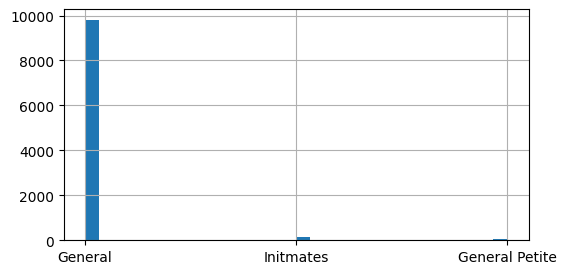

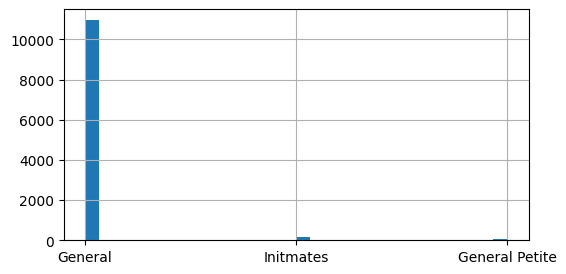

In [55]:
col = "Division Name"
display(train_df[col].value_counts(dropna=False))
display(test_df[col].value_counts(dropna=False))
train_df[col].hist(bins=30, figsize=(6, 3))
plt.show()
test_df[col].hist(bins=30, figsize=(6, 3))
plt.show()


Department Name
Tops        4841
Dresses     2980
Bottoms     1560
Jackets      411
Intimate     190
Trend         18
Name: count, dtype: int64

Department Name
Tops        5401
Dresses     3267
Bottoms     1804
Jackets      476
Intimate     184
Trend         23
Name: count, dtype: int64

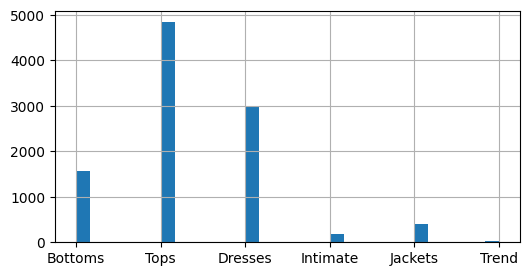

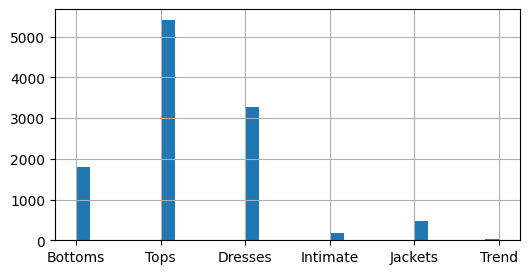

In [56]:
col = "Department Name"
display(train_df[col].value_counts(dropna=False))
display(test_df[col].value_counts(dropna=False))
train_df[col].hist(bins=30, figsize=(6, 3))
plt.show()
test_df[col].hist(bins=30, figsize=(6, 3))
plt.show()


Class Name
Dresses       2980
Knits         2246
Blouses       1477
Sweaters       615
Pants          587
Jeans          513
Fine gauge     503
Skirts         415
Jackets        273
Outerwear      138
Lounge         108
Shorts          45
Legwear         43
Swim            20
Layering        19
Trend           18
Name: count, dtype: int64

Class Name
Dresses       3267
Knits         2561
Blouses       1562
Sweaters       733
Pants          710
Jeans          596
Fine gauge     545
Skirts         446
Jackets        339
Outerwear      137
Lounge         116
Shorts          52
Legwear         31
Trend           23
Layering        22
Swim            15
Name: count, dtype: int64

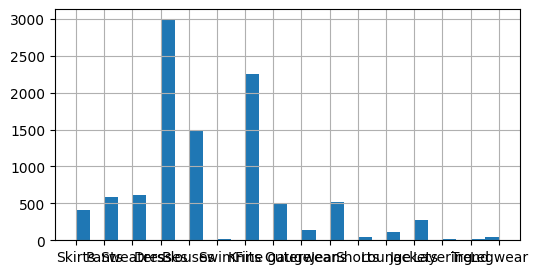

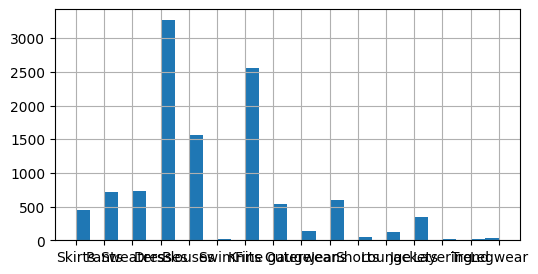

In [57]:
col = "Class Name"
display(train_df[col].value_counts(dropna=False))
display(test_df[col].value_counts(dropna=False))
train_df[col].hist(bins=30, figsize=(6, 3))
plt.show()
test_df[col].hist(bins=30, figsize=(6, 3))
plt.show()


### 相関係数

In [60]:
num_col = train_df.select_dtypes(include=[np.number]).columns
train_df[num_col].corr()


,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
Clothing ID,1.000000,-0.022604,0.013598,0.004254,-0.006449
Age,-0.022604,1.000000,0.021359,0.023563,0.035068
Rating,0.013598,0.021359,1.000000,0.791016,-0.057499
Recommended IND,0.004254,0.023563,0.791016,1.000000,-0.075364
Positive Feedback Count,-0.006449,0.035068,-0.057499,-0.075364,1.000000


### 服ごとのRating

<Axes: >

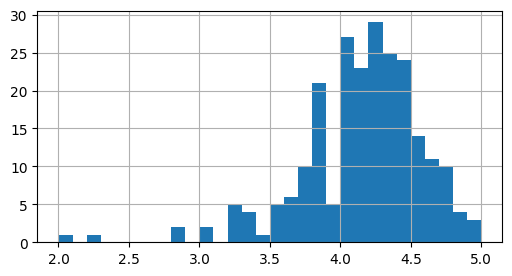

In [63]:
train_df.groupby("Clothing ID")["Rating"].mean().hist(bins=30, figsize=(6, 3))


### 服ごとのRecommended IND

<Axes: >

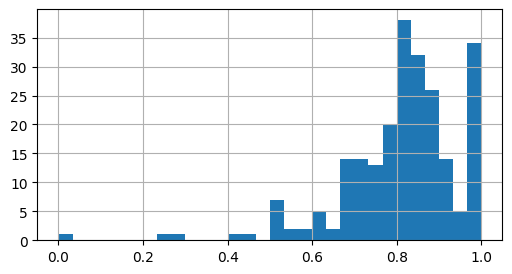

In [64]:
train_df.groupby("Clothing ID")[cfg.target].mean().hist(bins=30, figsize=(6, 3))
